In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from collections import Counter

In [2]:
retail= pd.read_excel("Online Retail.xlsx")
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
retail.isnull().sum()  #Missing values per column

#Description is needed for analysing product sales so if any values are missing they can't be filled
#Customer Id is needed for understanding customer behaviours and segment them accordingly 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
retail.dropna(inplace=True)   #deleting missing values

In [5]:
retail.isna().sum()     #no missing values left

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [6]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [7]:
retail["InvoiceDate"].dt.month
retail["InvoiceDate"].dt.day
retail["InvoiceDate"].dt.hour


0          8
1          8
2          8
3          8
4          8
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 406829, dtype: int32

In [8]:
retail = retail[retail['Quantity'] > 0] #removing rows with negative quantity

In [9]:
retail["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [10]:
retail['Country'] = retail['Country'].replace({"EIRE": "Ireland", "RSA": "South Africa","Israel": "Occupied Palestine"})

In [11]:
#Top 10 products by sale volume
retail.groupby('Description')["Quantity"].sum().sort_values(ascending=False).head(10)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

In [12]:
retail.insert(6,"Total Price",value= retail["Quantity"]*retail["UnitPrice"])
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Total Price,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom


In [13]:
#Top 10 products by revenue 
retail.groupby('Description')["Total Price"].sum().sort_values(ascending=False).head(1)

Description
PAPER CRAFT , LITTLE BIRDIE    168469.6
Name: Total Price, dtype: float64

In [14]:
retail["month"] = retail["InvoiceDate"].dt.month
retail["hour"]= retail["InvoiceDate"].dt.hour

In [15]:
retail.groupby("month")["Description"].value_counts()

month  Description                       
1      WHITE HANGING HEART T-LIGHT HOLDER    160
       SET OF 3 CAKE TINS PANTRY DESIGN      133
       HEART OF WICKER SMALL                 120
       REGENCY CAKESTAND 3 TIER              109
       SET OF 3 HEART COOKIE CUTTERS          97
                                            ... 
12     YELLOW/BLUE RETRO RADIO                 1
       YELLOW/PINK FLOWER DESIGN BIG MUG       1
       ZINC HEART LATTICE CHARGER LARGE        1
       ZINC HEART LATTICE CHARGER SMALL        1
       ZINC TOP  2 DOOR WOODEN SHELF           1
Name: count, Length: 29195, dtype: int64

In [16]:
retail["month"].value_counts()#.plot(kind='bar')

month
11    64545
10    49557
12    43464
9     40030
5     28322
6     27185
3     27177
8     27013
7     26827
4     22644
1     21232
2     19928
Name: count, dtype: int64

In [17]:
#best time to advertise is noon
retail['InvoiceDate'].dt.hour.value_counts()#.plot(kind='bar')

InvoiceDate
12    72069
13    64031
14    54127
11    49092
15    45372
10    37999
16    24093
9     21945
17    13072
8      8691
19     3322
18     2929
20      802
7       379
6         1
Name: count, dtype: int64

In [18]:
#Top 10 countries by revenue 
retail.groupby('Country')["Total Price"].sum().sort_values(ascending=False).head(10)


Country
United Kingdom    7308391.554
Netherlands        285446.340
Ireland            265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: Total Price, dtype: float64

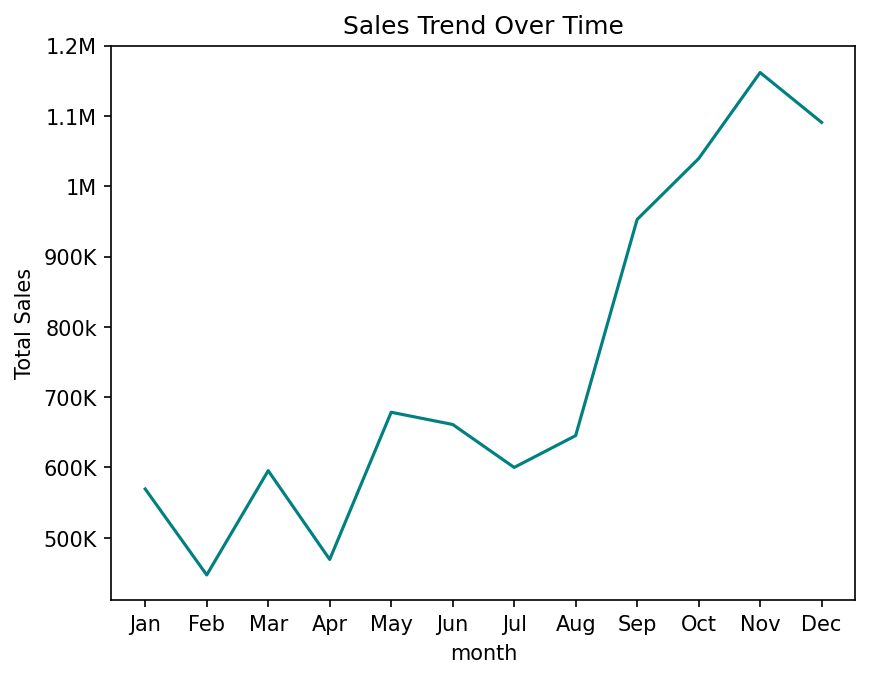

In [19]:
plt.figure(dpi=150)
retail.groupby("month")["Total Price"].sum().plot(kind= 'line', color= "teal")
plt.title("Sales Trend Over Time")
plt.ylabel("Total Sales")
plt.yticks([500_000,600_000,700_000,800_000,900_000,1_000_000,1_100_000,1_200_000], labels = ["500K","600K","700K","800k","900K","1M", "1.1M", "1.2M"])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], labels= ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.savefig("Sales Over Ther Year")


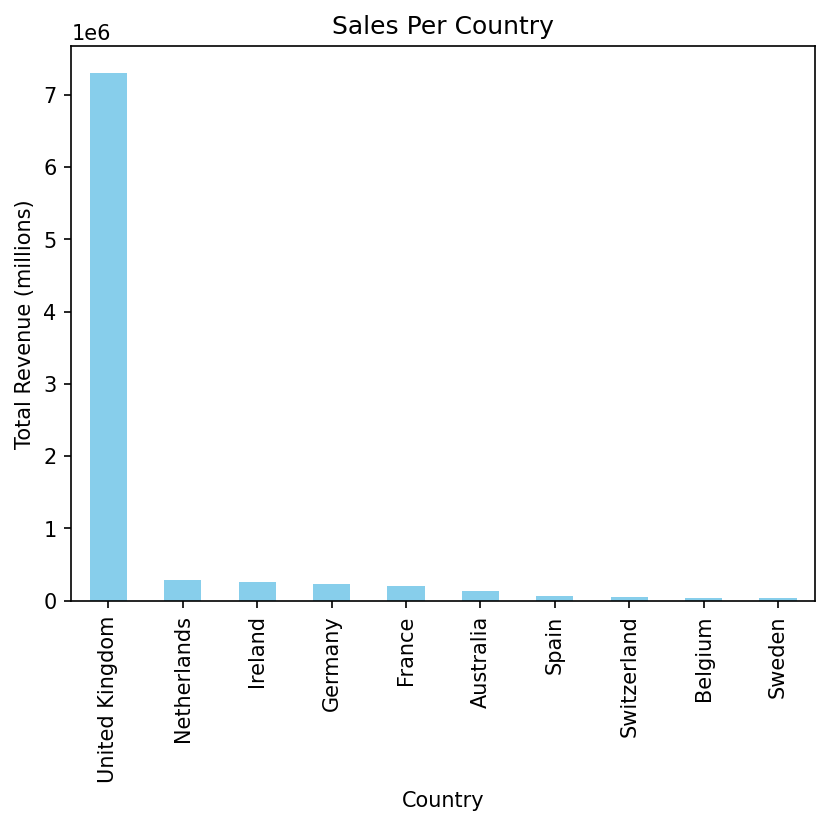

In [20]:
#Top 10 countries by revenue 
plt.figure(dpi=150)
retail.groupby('Country')["Total Price"].sum().sort_values(ascending=False).head(10).plot(kind= 'bar', color= "skyblue")
plt.title("Sales Per Country")
plt.xlabel("Country")
plt.ylabel("Total Revenue (millions)")
plt.savefig("Sales Per Country")

<Axes: xlabel='UnitPrice', ylabel='Quantity'>

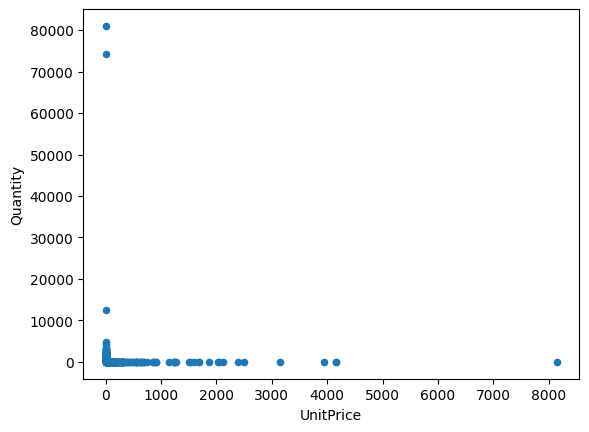

In [21]:
retail.plot(x= "UnitPrice", y= "Quantity", kind="scatter")

Correlation Coefficient= -0.02


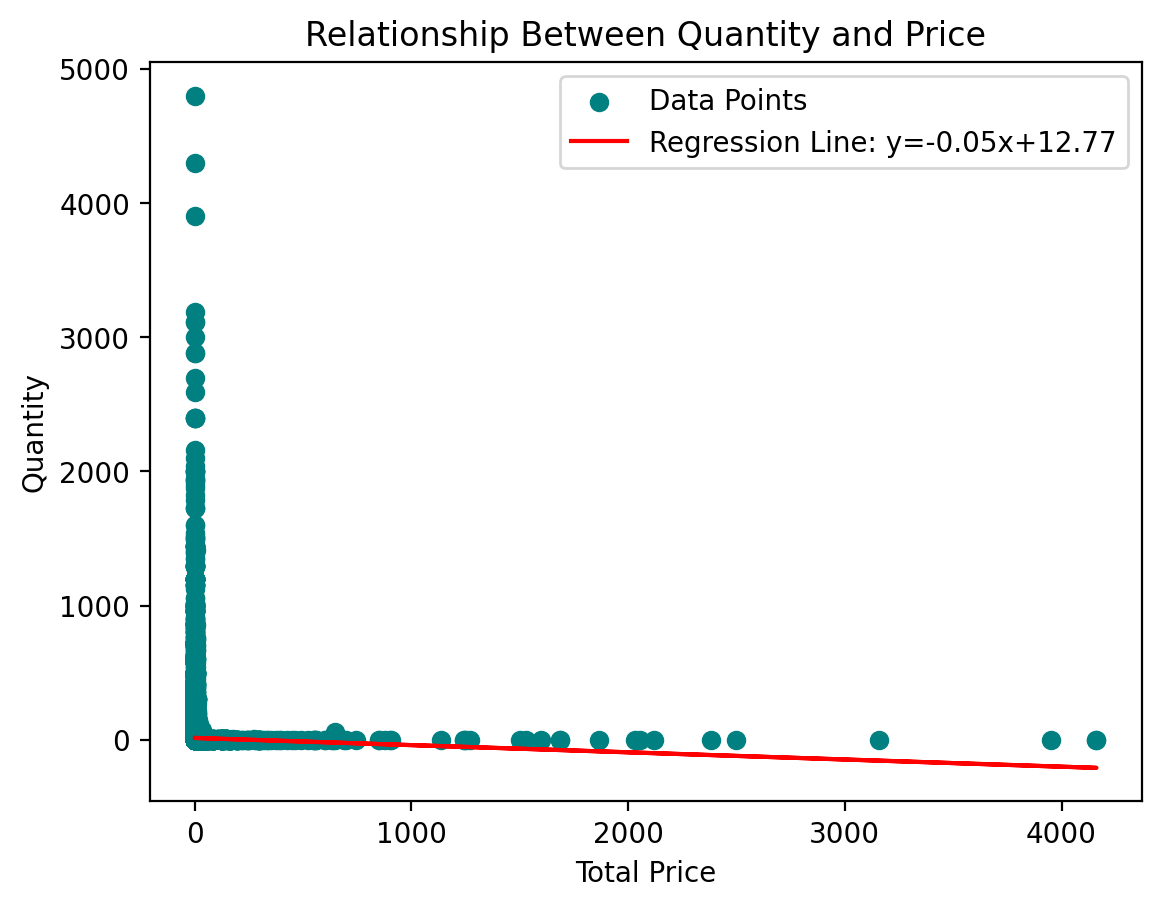

In [22]:
sub = retail[(retail.Quantity < 10000) & (retail["UnitPrice"] < 8000)]
x = sub["UnitPrice"]
y= sub["Quantity"]

plt.figure(dpi=200)
plt.scatter(x, y, color='teal', label='Data Points')
slope, intercept = np.polyfit(x, y, 1)

regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label=f'Regression Line: y={slope:.2f}x+{intercept:.2f}')
plt.title("Relationship Between Quantity and Price")
plt.ylabel("Quantity")
plt.xlabel("Total Price")
plt.legend(loc= "upper right")
plt.savefig("Relationship Between Quantity and Price")
print(f"Correlation Coefficient= {np.corrcoef(x, y)[1][0]:.2f}")


In [24]:

# Group by InvoiceNo and list all products in a single order
df = retail
df['Grouped'] = df.groupby('InvoiceNo')['Description'].transform(lambda x: ','.join(x))
df = df[['InvoiceNo', 'Grouped']].drop_duplicates()

# Count the combinations
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

# Display the most common product combinations
count.most_common(10)

[(('KEY FOB ', 'KEY FOB '), 643),
 (('KEY FOB ', ' BACK DOOR '), 451),
 (('GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'), 444),
 (('KEY FOB ', ' SHED'), 425),
 (('KEY FOB ', ' FRONT  DOOR '), 350),
 (('LUNCH BAG RED RETROSPOT', 'LUNCH BAG PINK POLKADOT'), 327),
 (('LUNCH BAG RED RETROSPOT', 'LUNCH BAG  BLACK SKULL.'), 316),
 (('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'), 315),
 (('ROSES REGENCY TEACUP AND SAUCER ', 'GREEN REGENCY TEACUP AND SAUCER'),
  314),
 (('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '),
  304)]

In [25]:
# Calculting RFM to segment customers 
# RFM is short for:
# Recency: How recent was a customer's last purchase 
# Frequency: How often does the customer purchase
# Monetary: How much each cutomer spent

In [26]:
customers = retail.groupby(["CustomerID", "InvoiceNo","InvoiceDate"])["Total Price"].sum()
customers = pd.DataFrame(customers)
customers.reset_index(inplace=True)

customers.head()

,CustomerID,InvoiceNo,InvoiceDate,Total Price
0,12346.0,541431,2011-01-18 10:01:00,77183.60
1,12347.0,537626,2010-12-07 14:57:00,711.79
2,12347.0,542237,2011-01-26 14:30:00,475.39
3,12347.0,549222,2011-04-07 10:43:00,636.25
4,12347.0,556201,2011-06-09 13:01:00,382.52


In [27]:
reference_date = customers['InvoiceDate'].max()  

rfm = customers.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'CustomerID': 'count',                                         # Frequency
    'Total Price': 'sum'                                      # Monetary
})
rfm.head()

,InvoiceDate,CustomerID,Total Price
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


In [28]:
rfm.rename(columns={"InvoiceDate" :'Recency',"CustomerID": 'Frequency',"Total Price": 'Monetary'}, inplace=True)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


In [29]:
# Define quantiles
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine RFM scores
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)


In [30]:
rfm.sort_values(by="RFM_Score", ascending=False)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
13685.0,2,7,3119.44,5,5,5,555
13999.0,9,12,3901.81,5,5,5,555
16360.0,4,6,3512.53,5,5,5,555
16353.0,3,23,6675.71,5,5,5,555
13949.0,2,6,2427.32,5,5,5,555
...,...,...,...,...,...,...,...
15723.0,364,1,203.10,1,1,1,111
12506.0,232,1,73.50,1,1,1,111
15717.0,233,1,150.30,1,1,1,111


In [31]:
rfm["RFM_Score"].sort_values(ascending=False).unique()

array(['555', '554', '553', '552', '551', '545', '544', '543', '542',
       '541', '535', '534', '533', '532', '531', '525', '524', '523',
       '522', '521', '515', '513', '512', '511', '455', '454', '453',
       '452', '445', '444', '443', '442', '435', '434', '433', '432',
       '431', '425', '424', '423', '422', '421', '415', '414', '413',
       '412', '411', '355', '354', '353', '345', '344', '343', '342',
       '341', '335', '334', '333', '332', '331', '325', '324', '323',
       '322', '321', '315', '314', '313', '312', '311', '255', '254',
       '253', '251', '245', '244', '243', '242', '241', '235', '234',
       '233', '232', '231', '225', '224', '223', '222', '221', '215',
       '214', '213', '212', '211', '155', '154', '153', '152', '145',
       '144', '143', '142', '141', '135', '134', '133', '132', '131',
       '125', '124', '123', '122', '121', '115', '114', '113', '112',
       '111'], dtype=object)

In [32]:
def segment_customer(row):
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']
    
    if r >= 4 and f >= 4 and m >= 4:  # Champions: High Recency, Frequency, and Monetary scores. These are your best customers.
        return 'Champion'   
    
    elif r >= 4 and f >= 3:           # Loyal Customers: These customers purchase often and have a high Recency score, indicating they are currently active.
        return 'Loyal Customer'
    
    elif r >= 3 and f >= 3 and m >= 2:   # Potential Loyalists: These customers have a strong purchasing pattern but may not be as frequent or recent as Champions.
        return 'Potential Loyalist'
    
    elif r >= 4:                        # New Customers: High Recency score, but not yet frequent or high spenders.
        return 'New Customer'
    
    elif r >= 3 and f >= 2:     # Promising: Customers with potential, but they may need more engagement to become loyal.
        return 'Promising'
    
    elif r >= 2 and f <= 2:     # Customers Needing Attention: These customers are less engaged but may still have potential if re-engaged.
        return 'Customers Needing Attention'
    
    elif r <= 2 and f >= 2:     # At Risk: These customers have lower Recency scores and are at risk of churning.
        return 'At Risk'
    
    elif r <= 2 and f >= 4 and m >= 3:  # Can't Lose Them: High Frequency and Monetary scores, but low Recency. These are valuable customers that you need to re-engage.
        return 'Can\'t Lose Them'
    
    else:
        return 'Hibernating'        # Hibernating: These customers are inactive and have low scores across all metrics.
    
    



In [33]:

# Apply the segmentation function
rfm['Segment'] = rfm.apply(segment_customer, axis=1)
rfm.Segment.unique()

array(['Hibernating', 'Champion', 'At Risk', 'New Customer',
       'Potential Loyalist', 'Loyal Customer',
       'Customers Needing Attention', 'Promising'], dtype=object)

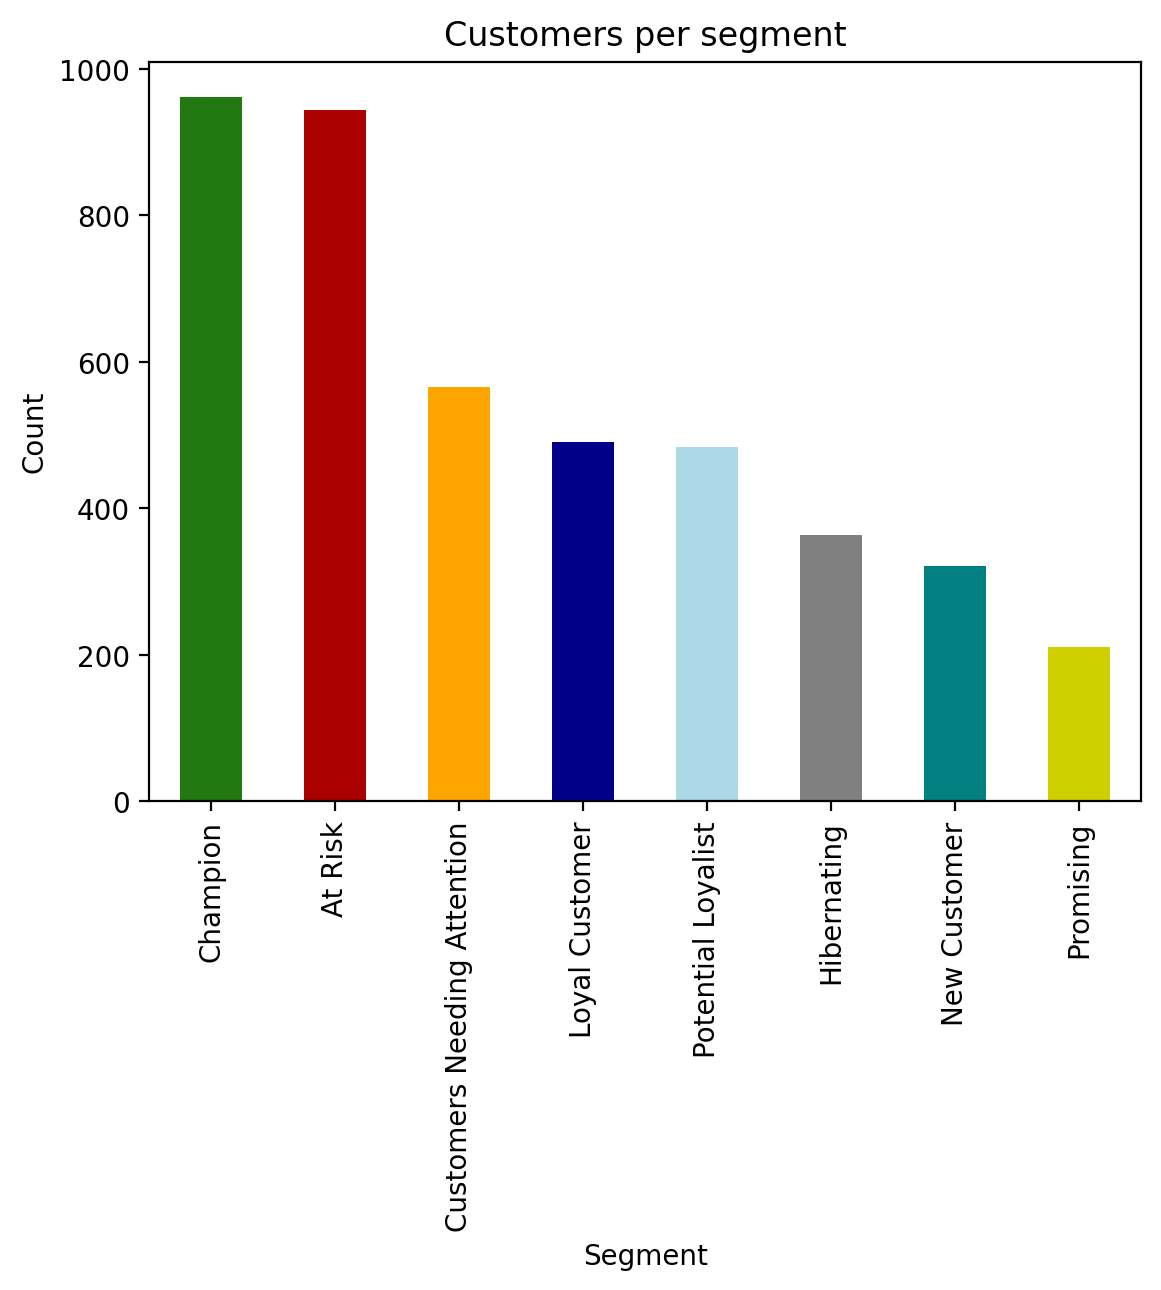

In [34]:

plt.figure(dpi=200)
rfm['Segment'].value_counts().plot.bar(
    color={'#227811':"Champion", '#aa0000': 'At Risk',
            "orange": "Customers Needing Attention",
            'darkblue' : "Loyal Customers", 'lightblue': 'Potential Loyalist',
            'grey': 'Hibernating', 'teal': 'New Customers',
            '#cfcf00': 'Promising'})

plt.title("Customers per segment")
plt.ylabel("Count")
plt.savefig("Customer Segments")